In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

## **Database**

Extracting Data from Kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:50<00:00, 23.8MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.6MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Generators

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


## Normalize

In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Create CNN model

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 110ms/step - loss: 1.1986 - accuracy: 0.5881 - val_loss: 3.4023 - val_accuracy: 0.5084
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6313 - accuracy: 0.6590 - val_loss: 0.5564 - val_accuracy: 0.7062
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5324 - accuracy: 0.7332 - val_loss: 0.5237 - val_accuracy: 0.7472
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4593 - accuracy: 0.7860 - val_loss: 0.4778 - val_accuracy: 0.7850
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4111 - accuracy: 0.8110 - val_loss: 0.5035 - val_accuracy: 0.7646
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3549 - accuracy: 0.8377 - val_loss: 0.5975 - val_accuracy: 0.7456
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2891 - accuracy: 0.8725 - val_loss: 0.4385 - val_ac

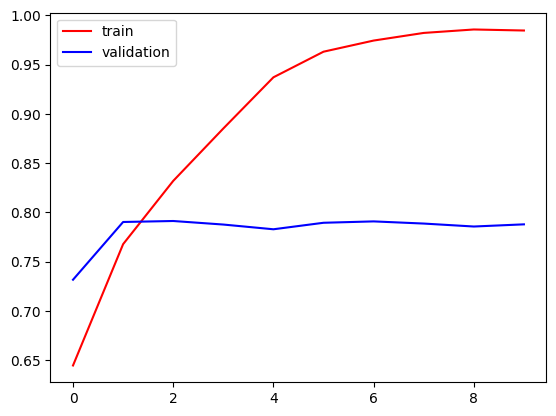

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

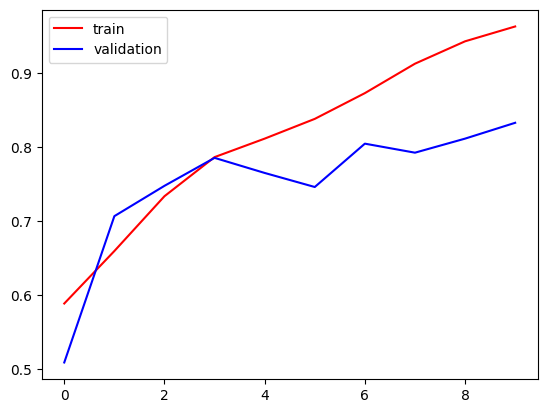

In [ ]:
# After improving Validation accuracy
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

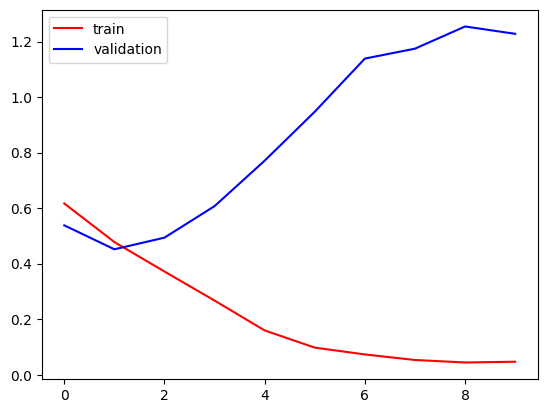

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

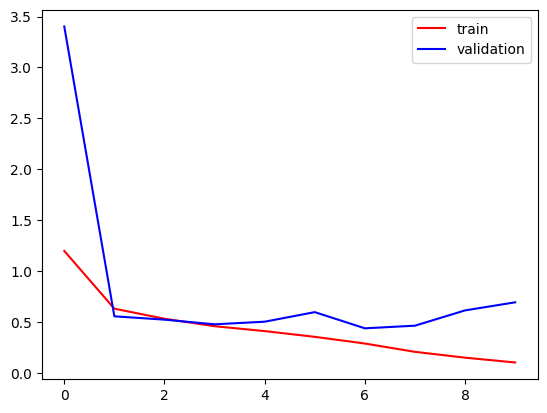

In [ ]:
# After improving Validation accuracy
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Dropout
# Batch Norm

# **Predictions**

<hr>

**Let's Predict Unknown image**

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dogs.jpg')

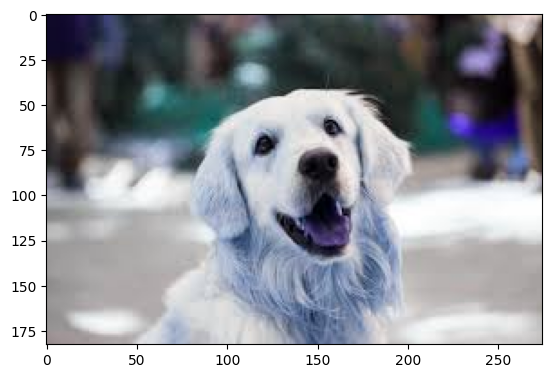

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(183, 275, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)   # array[1] means dog

1/1 [==============================] - 0s 393ms/step


array([[1.]], dtype=float32)

<hr>

**Let's Predict another image**

In [ ]:
test_img_1 = cv2.imread('/content/cat.jpeg')

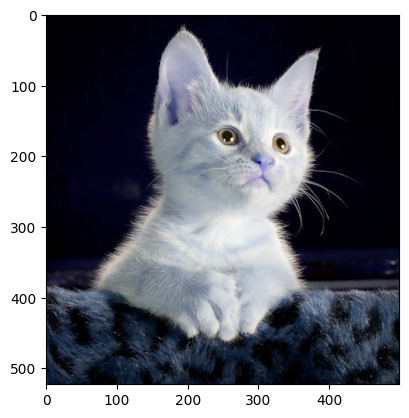

In [ ]:
plt.imshow(test_img_1)

In [ ]:
test_img_1.shape

(523, 500, 3)

In [ ]:
test_img_1 = cv2.resize(test_img_1,(256,256))

In [ ]:
test_input1 = test_img_1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input1)   # array[0] means cat

1/1 [==============================] - 0s 22ms/step


array([[0.]], dtype=float32)